In [91]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

In [57]:
df = pd.read_csv('E-Commerce-Dataset.csv')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [58]:
encoder = LabelEncoder()
df['PreferredLoginDevice'] = encoder.fit_transform(df['PreferredLoginDevice'].values)
df['PreferedOrderCat'] = encoder.fit_transform(df['PreferedOrderCat'].values)
df['PreferredPaymentMode'] = encoder.fit_transform(df['PreferredPaymentMode'].values)
df['MaritalStatus'] = encoder.fit_transform(df['MaritalStatus'].values)
df['Gender'] = encoder.fit_transform(df['Gender'].values)
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,2,1,12.0,0,1,NaN,3,3,5,2,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,0,1,30.0,3,1,3.0,2,2,1,1,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,1,1,13.0,3,1,3.0,5,0,5,1,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,1,1,11.0,4,1,3.0,2,2,4,1,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,0,3,9.0,3,1,4.0,5,2,4,1,4,0,15.0,2.0,2.0,9.0,179


In [59]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

# Unfilled data data statistics

In [60]:
print(f"Filled data: {int((1 - df.isnull().sum().sum()/len(df)) * 100)}")
print(f"Unfilled data: {int((df.isnull().sum().sum()/len(df)) * 100)}")

Filled data: 67
Unfilled data: 32


# I prefer sorting data than deleting the unfilled data because of percentage

In [61]:
df1 = df.dropna()
df1.corrwith(df1['Churn']).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.340013
Complain                       0.238137
NumberOfDeviceRegistered       0.149041
DaySinceLastOrder              0.139254
MaritalStatus                  0.134036
PreferedOrderCat               0.131023
SatisfactionScore              0.095759
WarehouseToHome                0.087318
NumberOfAddress                0.076336
CityTier                       0.073858
HourSpendOnApp                 0.060845
CashbackAmount                 0.058866
Gender                         0.033792
CustomerID                     0.031617
PreferredPaymentMode           0.024731
OrderAmountHikeFromlastYear    0.017193
CouponUsed                     0.010982
PreferredLoginDevice           0.003295
OrderCount                     0.001962
dtype: float64

In [62]:
df = df[['Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'Gender', 'Churn']]
df

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore,Gender,Churn
0,4.0,1,5.0,160,3,2,0,1
1,NaN,1,0.0,121,4,3,1,1
2,NaN,1,3.0,120,4,3,1,1
3,0.0,0,3.0,134,4,5,1,1
4,0.0,0,3.0,130,3,5,1,1
...,...,...,...,...,...,...,...,...
5625,10.0,0,4.0,151,2,1,1,0
5626,13.0,0,NaN,225,5,5,1,0
5627,1.0,1,4.0,186,2,4,1,0
5628,23.0,0,9.0,179,5,4,1,0


In [63]:
print(f"Filled data: {int((1 - df.isnull().sum().sum()/len(df)) * 100)}")
print(f"Unfilled data: {int((df.isnull().sum().sum()/len(df)) * 100)}")

Filled data: 89
Unfilled data: 10


In [68]:
df = df.dropna()

# Goo to Machine Learning part

In [69]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)


In [74]:
dv_tree_model = DecisionTreeClassifier().fit(X_train, y_train)

In [75]:
y_pred = dv_tree_model.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred))
print("Model accuracy", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1279
           1       0.83      0.82      0.82       239

    accuracy                           0.95      1518
   macro avg       0.90      0.89      0.90      1518
weighted avg       0.94      0.95      0.95      1518

Model accuracy 0.9453227931488801


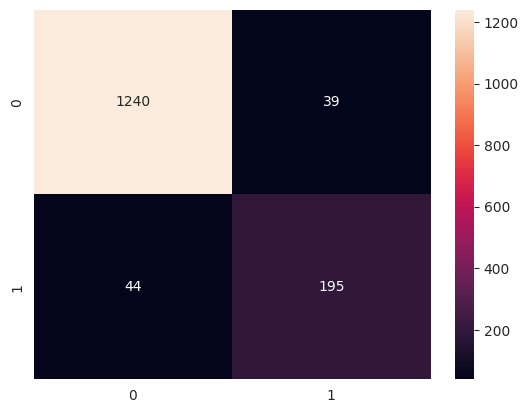

In [89]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

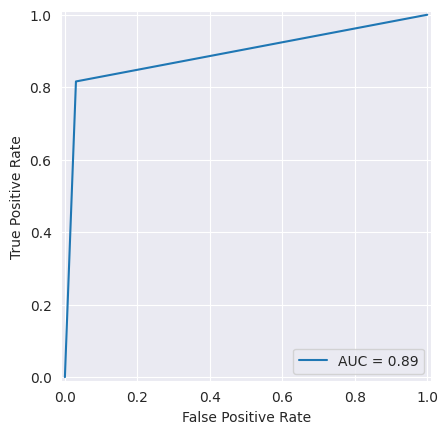

In [92]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

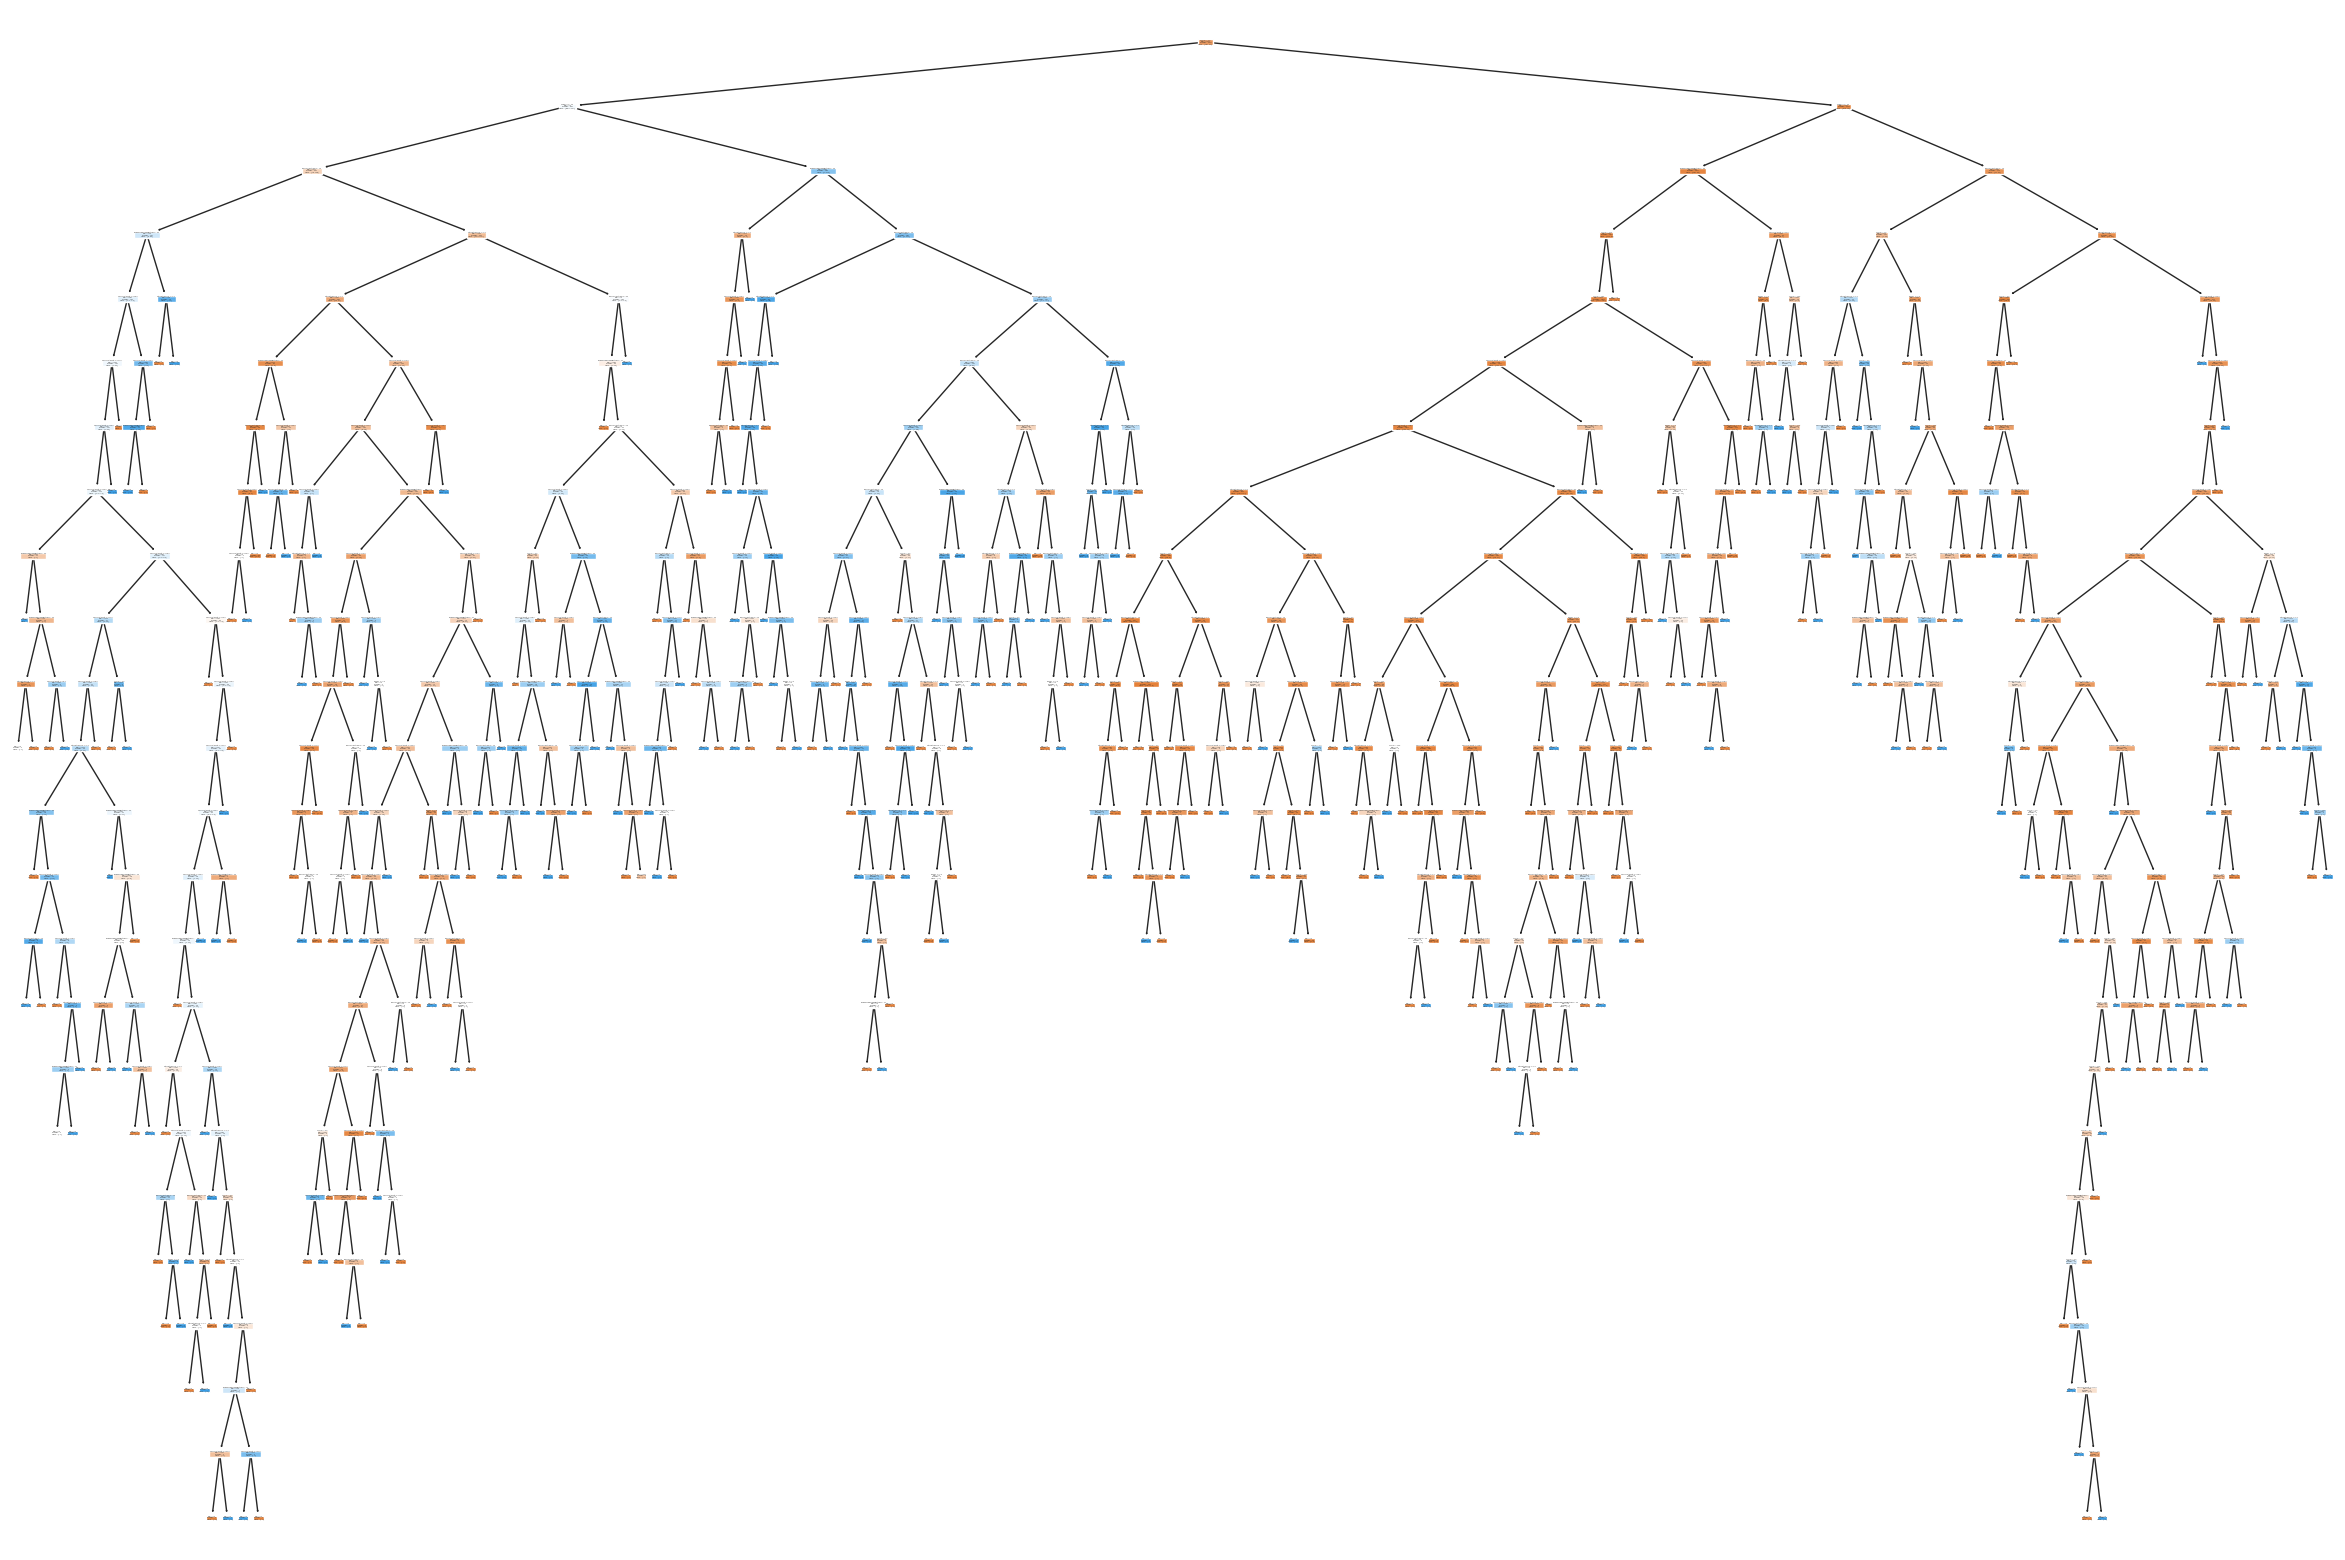

In [93]:
cols = df.drop('Churn', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(dv_tree_model, feature_names=cols, filled=True)
plt.show()